In [1]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans2
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
k=10
# filepath = '../imgs/flight.png'
# filepath = '../imgs/otk.png'
filepath = '../imgs/oranges.png'
# filepath = '../imgs/flowers.png'
# filepath = '../imgs/batman.PNG'
# filepath = '../imgs/pexels-cmonphotography-1809644.png'
image = img.imread(filepath)
nrows, ncols, ncolors = image.shape
image.shape

(1293, 970, 3)

In [3]:
im = np.array(image[:,:,0:3])
nrows, ncols, ncolors = im.shape
im_arr = np.reshape(im, (nrows*ncols, 3)) 
df = pd.DataFrame(im_arr, columns=['red', 'green', 'blue'])
 
df['scaled_red'] = whiten(df['red'])
df['scaled_blue'] = whiten(df['blue'])
df['scaled_green'] = whiten(df['green'])
 

In [4]:

cluster_centers, lables = kmeans2(df[['scaled_red',
                                      'scaled_green',
                                      'scaled_blue']], k=k)

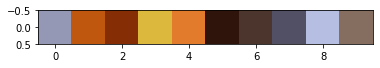

In [5]:
dominant_colors = []

rgb_std  = np.expand_dims(df[['red', 'green', 'blue']].std(), axis=0)
dominant_colors = cluster_centers*rgb_std
 
plt.imshow([dominant_colors])
plt.show()

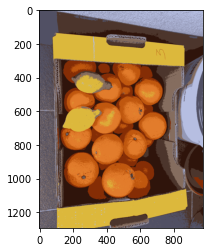

In [6]:
fname = filepath.split('/')[-1].split('.')
path = filepath[0:-len(filepath.split('/')[-1])]
new_fname = '.'.join([''.join(fname[0:-1] + ['_k{}'.format(k)]), fname[-1]])

new_im = np.array(dominant_colors)[lables].reshape((nrows,ncols,3))

plt.imshow(new_im, cmap='gray')
# plt.savefig(path+new_fname)
plt.show()

In [7]:
i=Image.fromarray(np.uint8(new_im*255))
i.save(path+new_fname)